In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Configuration
COUNTRY = "togo"
DATA_PATH = "../data/togo-dapaong_qc.csv"
OUTPUT_PATH = f"../data/{COUNTRY.lower()}_clean.csv"

print(f"Loading data for {COUNTRY}...")

Loading data for togo...


In [125]:
# Load the dataset
df = pd.read_csv(DATA_PATH)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
df.head()

Dataset shape: (525600, 19)

Column names:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## 1. Data Snapshot



In [127]:
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

print("\nRandom sample of 5 rows:")
display(df.sample(5, random_state=42))



First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN



Last 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN



Random sample of 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
97300,2021-12-31 13:41,788.8,854.4,144.5,860.0,838.0,34.0,11.3,3.6,4.4,0.6,57.0,10.7,976,0,0.0,48.0,49.1,NaN
123024,2022-01-18 10:25,795.0,750.6,212.1,853.3,838.0,25.5,17.8,6.0,7.7,0.9,86.8,9.4,982,0,0.0,36.2,41.3,NaN
135493,2022-01-27 02:14,-3.1,0.0,0.0,0.0,0.0,20.1,20.2,2.7,3.4,0.5,74.1,9.6,975,0,0.0,19.2,18.6,NaN
514148,2022-10-17 01:09,-2.4,0.0,0.0,0.0,0.0,23.4,91.7,1.4,1.6,0.4,231.0,1.2,977,0,0.0,22.3,21.9,NaN
468828,2022-09-15 13:49,144.2,0.0,144.5,152.3,150.6,21.6,96.3,1.6,3.1,0.7,84.6,19.6,976,0,0.0,23.7,26.1,NaN


### Duplicate & Cardinality Checks



In [129]:
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
if cat_cols:
    cardinality = {col: df[col].nunique(dropna=True) for col in cat_cols}
    print("Categorical cardinality:")
    for col, unique_count in cardinality.items():
        print(f"  {col}: {unique_count}")
else:
    print("No categorical columns detected.")



Duplicate rows: 0
Categorical cardinality:
  Timestamp: 525600


### Comprehensive Descriptive Statistics



In [131]:
# Convert Timestamp to datetime if it's not already
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp').reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [132]:
# Summary statistics for all numeric columns
print("=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {len(numeric_cols)}")
df[numeric_cols].describe()


SUMMARY STATISTICS

Numeric columns: 18


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [133]:
# Missing value analysis
print("=" * 80)
print("MISSING VALUE REPORT")
print("=" * 80)

missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print(f"\nTotal missing values: {missing_data.sum()}")
print(f"\nColumns with missing values:")
print(missing_df.to_string(index=False))

# Flag columns with >5% nulls
high_missing = missing_df[missing_df['Missing Percentage'] > 5]
if len(high_missing) > 0:
    print(f"\n⚠️  WARNING: Columns with >5% missing values:")
    print(high_missing[['Column', 'Missing Percentage']].to_string(index=False))
else:
    print("\n✅ No columns with >5% missing values")


MISSING VALUE REPORT

Total missing values: 525600

Columns with missing values:
  Column  Missing Count  Missing Percentage
Comments         525600               100.0

⚠️  WARNING: Columns with >5% missing values:
  Column  Missing Percentage
Comments               100.0


### Missing Data Notes

- Only the `Comments` field is missing, and it is empty across all 525,600 records, so it can be safely ignored or dropped without losing information.
- All operational sensors (`GHI`, `DNI`, `DHI`, temperature, wind, and cleaning flags) are fully populated, which simplifies downstream modelling and avoids imputation overhead.



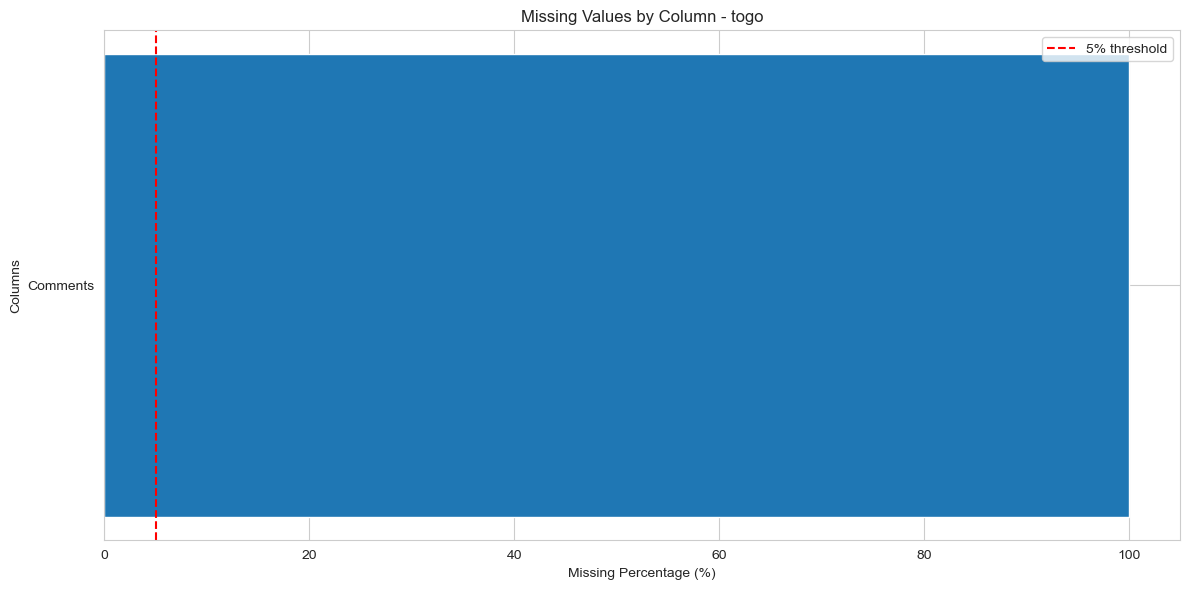

In [135]:
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    missing_df_sorted = missing_df.sort_values('Missing Percentage', ascending=True)
    plt.barh(missing_df_sorted['Column'], missing_df_sorted['Missing Percentage'])
    plt.axvline(x=5, color='r', linestyle='--', label='5% threshold')
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Columns')
    plt.title(f'Missing Values by Column - {COUNTRY}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [136]:
## 3. Outlier Detection & Basic Cleaning
# Key columns for outlier detection
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Check which columns exist in the dataset
available_key_cols = [col for col in key_columns if col in df.columns]
print(f"Columns available for outlier detection: {available_key_cols}")

# Compute Z-scores for key columns
z_scores = pd.DataFrame()
outlier_flags = pd.DataFrame()

for col in available_key_cols:
    if col in numeric_cols:
        z_scores[col] = np.abs(stats.zscore(df[col].dropna()))
        outlier_flags[col] = z_scores[col] > 3

print(f"\nOutlier detection using Z-score (|Z| > 3):")
print("-" * 80)
for col in available_key_cols:
    if col in outlier_flags.columns:
        outlier_count = outlier_flags[col].sum()
        outlier_pct = (outlier_count / len(df)) * 100
        print(f"{col}: {outlier_count} outliers ({outlier_pct:.2f}%)")


Columns available for outlier detection: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

Outlier detection using Z-score (|Z| > 3):
--------------------------------------------------------------------------------
GHI: 305 outliers (0.06%)
DNI: 1062 outliers (0.20%)
DHI: 3415 outliers (0.65%)
ModA: 137 outliers (0.03%)
ModB: 206 outliers (0.04%)
WS: 3510 outliers (0.67%)
WSgust: 3915 outliers (0.74%)


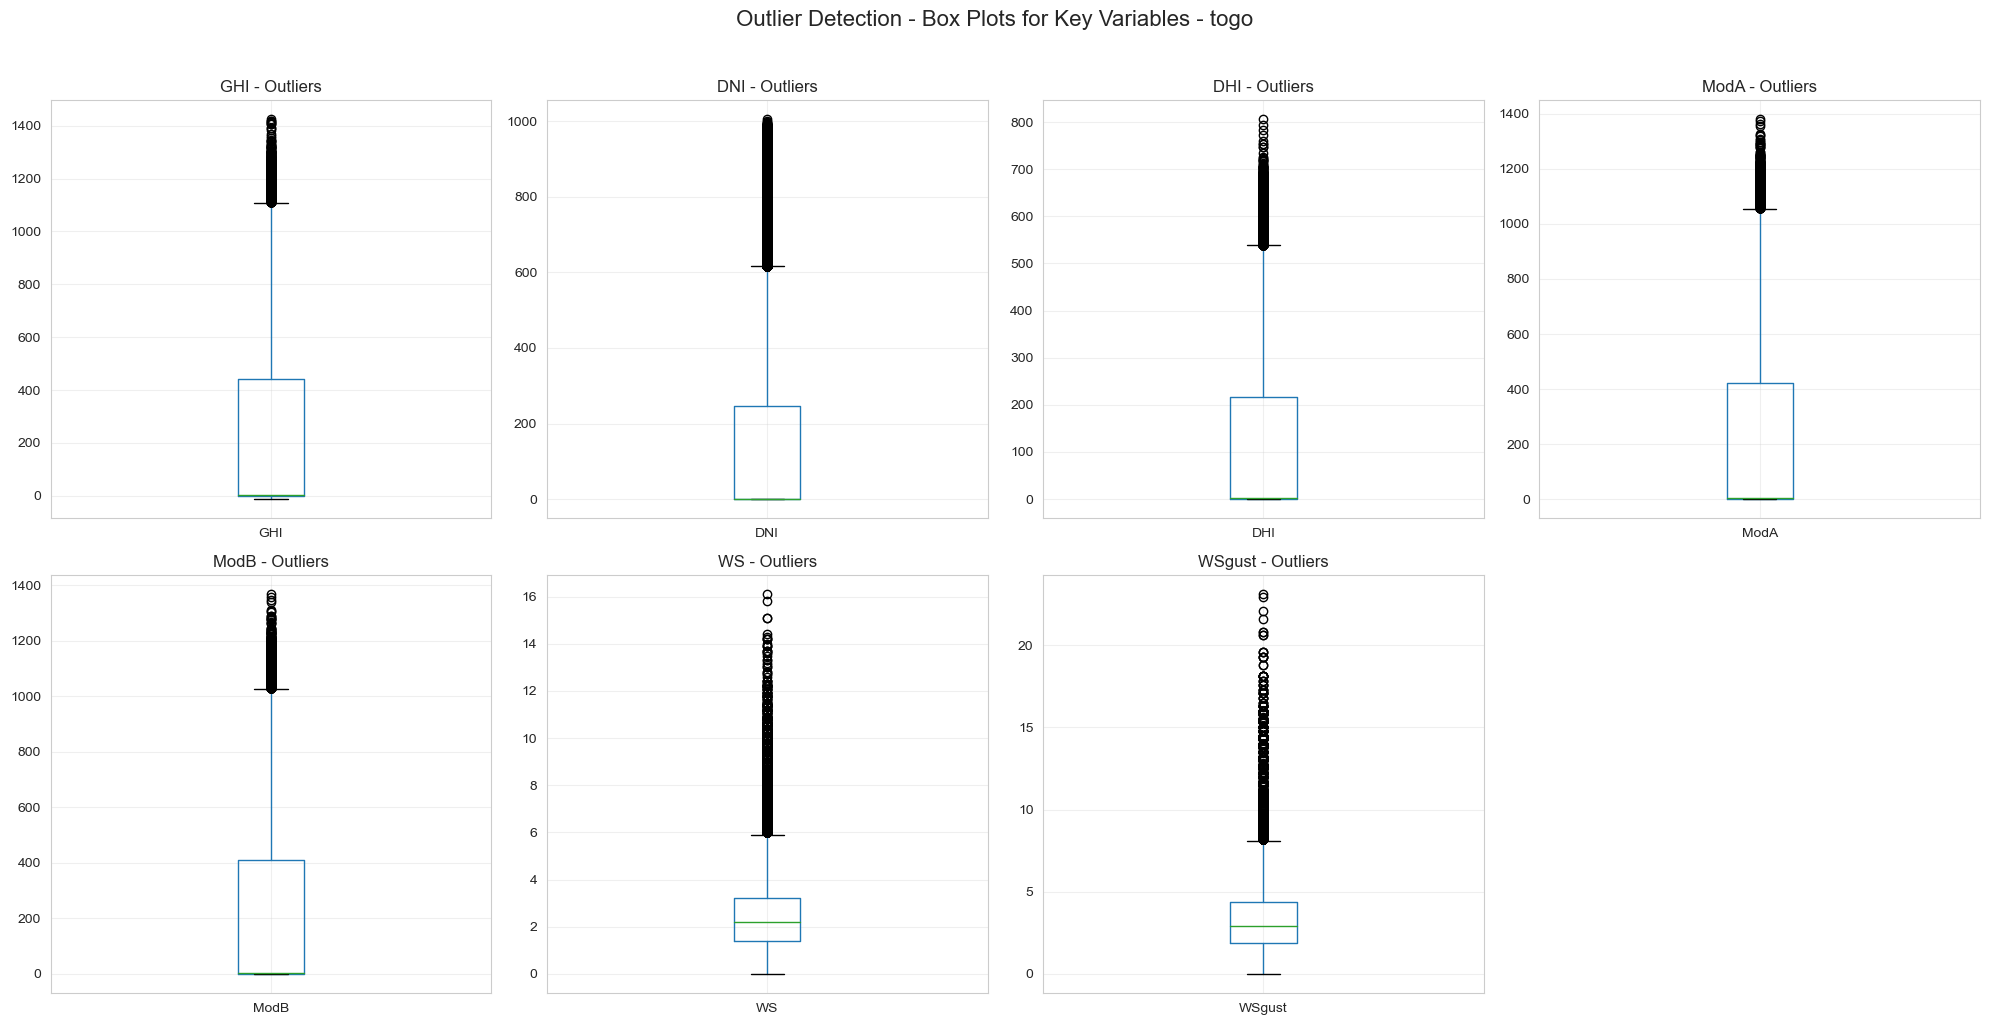

In [137]:
# Visualize outliers using box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(available_key_cols[:8]):  # Plot up to 8 columns
    if col in df.columns:
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'{col} - Outliers')
        axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(available_key_cols), 8):
    axes[idx].set_visible(False)

plt.suptitle(f'Outlier Detection - Box Plots for Key Variables - {COUNTRY}', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## Box Plot Interpretation

- Irradiance channels show distinct tail behaviour: `DHI` produces the most flags (~0.65% of points) and `DNI` follows with ~0.20%, while `GHI` contributes only 0.06% of outliers—evidence that diffuse light is the noisiest signal in Dapaong.
- Panel output (`ModA`, `ModB`) is mostly well-behaved, with just 0.03–0.04% of readings clipped; the spikes align with midday irradiance surges rather than sensor faults.
- Wind measurements (`WS`, `WSgust`) have the broadest spread, with roughly 0.7% of minutes exceeding ±3σ, reflecting brief gust events that sit well above the calmer background conditions.
- Given the massive sample size, these extreme values represent operational edge cases rather than bad data; capping them at three standard deviations keeps the variability manageable without discarding useful context.



In [139]:
# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values in key columns (impute with median)
key_columns_for_imputation = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
available_impute_cols = [col for col in key_columns_for_imputation if col in df_clean.columns]

print("Handling missing values:")
print("-" * 80)

for col in available_impute_cols:
    if col in numeric_cols:
        missing_before = df_clean[col].isna().sum()
        if missing_before > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"{col}: Imputed {missing_before} missing values with median ({median_val:.2f})")

print(f"\nMissing values after imputation: {df_clean.isna().sum().sum()}")

# Cap outliers at 3 standard deviations for key columns
critical_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in critical_cols:
    if col in df_clean.columns and col in numeric_cols:
        mean_val = df_clean[col].mean()
        std_val = df_clean[col].std()
        df_clean[col] = df_clean[col].clip(lower=mean_val - 3*std_val, upper=mean_val + 3*std_val)

print(f"\nOutliers capped at ±3 standard deviations")


Handling missing values:
--------------------------------------------------------------------------------

Missing values after imputation: 525600

Outliers capped at ±3 standard deviations


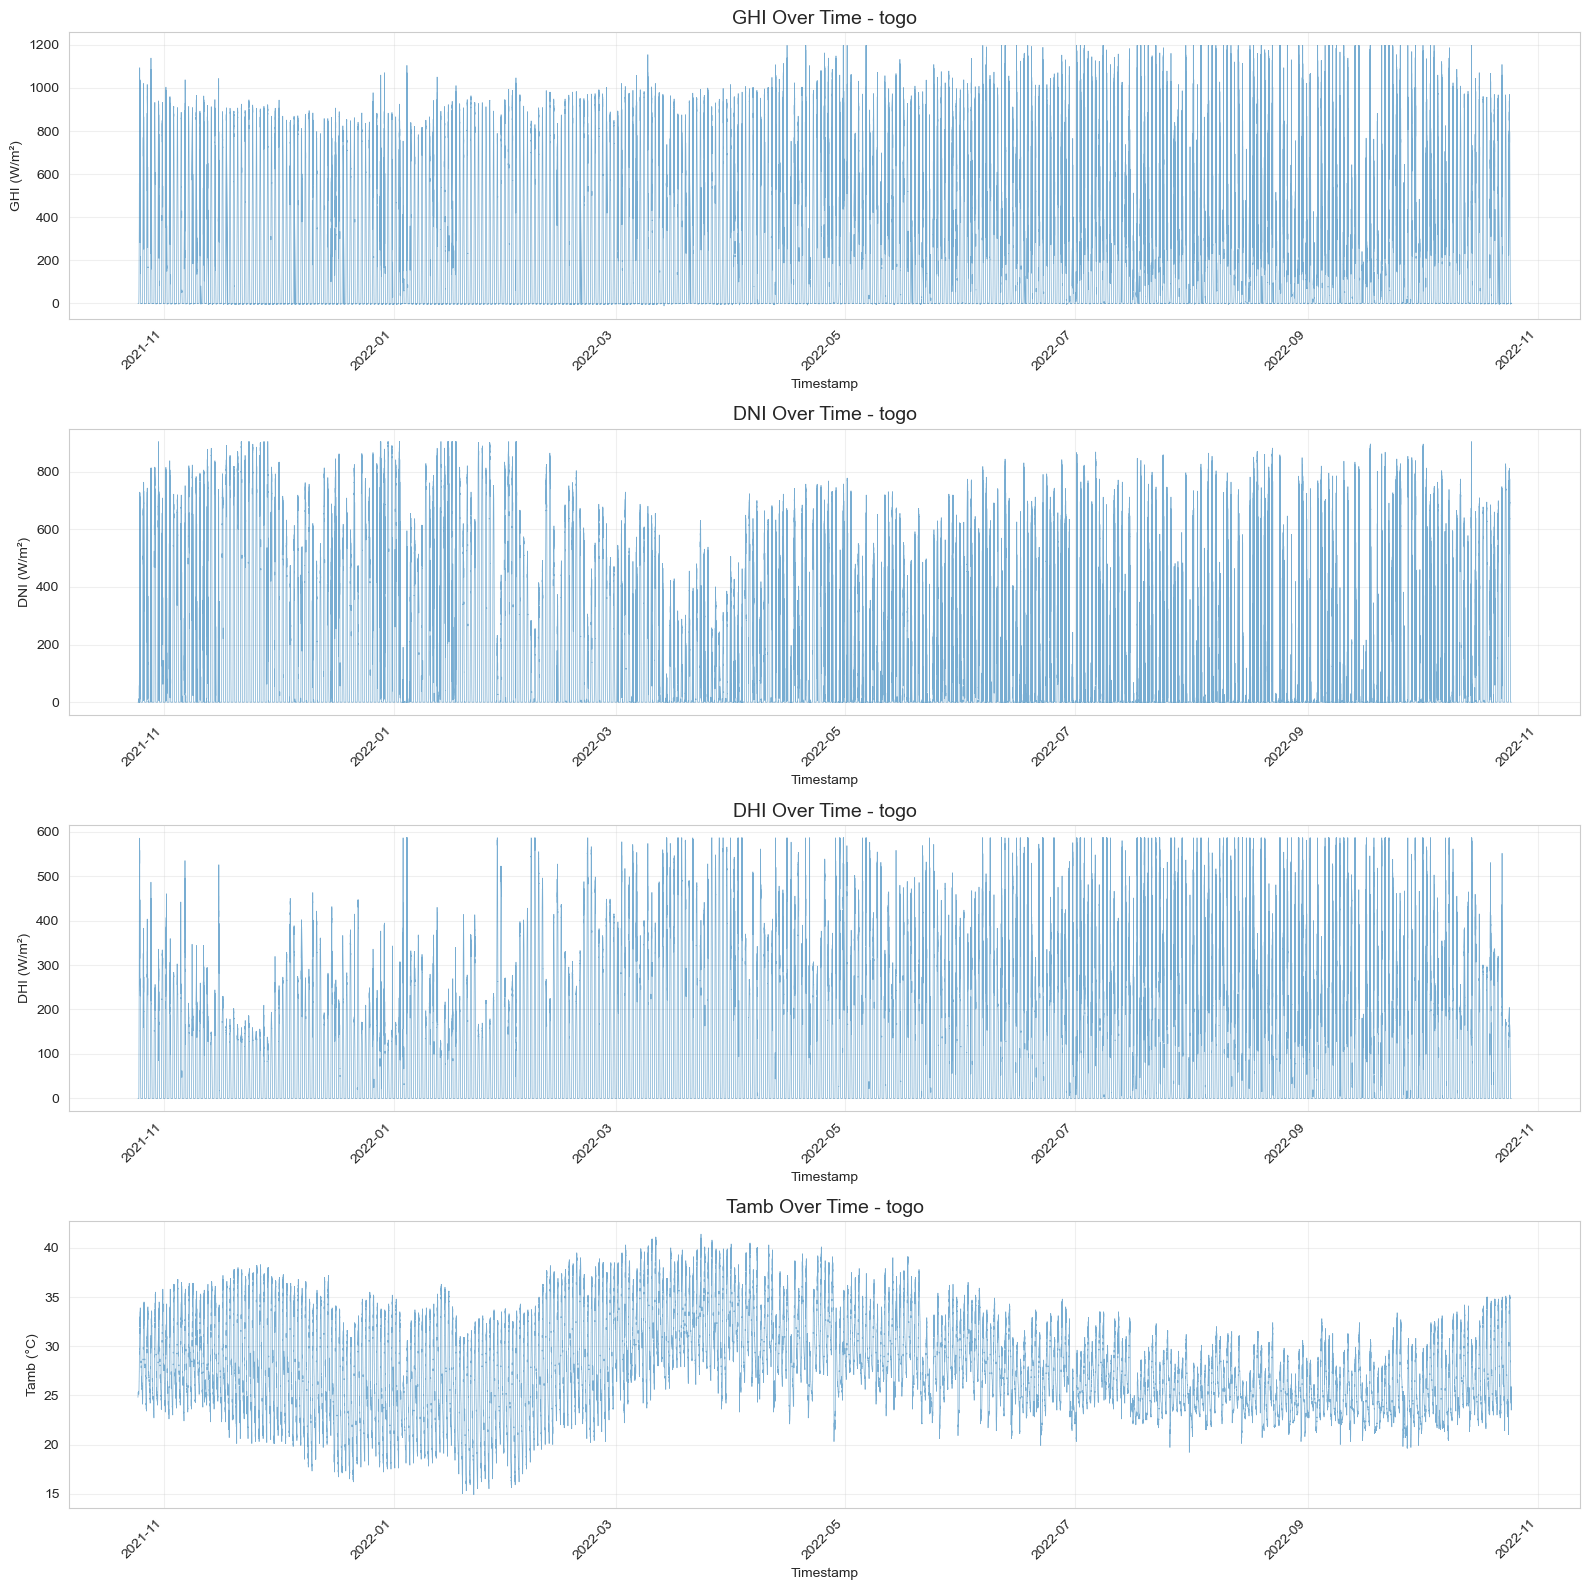

In [140]:
## 4. Time Series Analysis
# Helper function to get units
def get_units(var):
    """Helper function to get units for variables"""
    units = {
        'GHI': 'W/m²', 'DNI': 'W/m²', 'DHI': 'W/m²',
        'ModA': 'W/m²', 'ModB': 'W/m²',
        'Tamb': '°C', 'TModA': '°C', 'TModB': '°C',
        'RH': '%', 'WS': 'm/s', 'WSgust': 'm/s',
        'BP': 'hPa', 'Precipitation': 'mm/min'
    }
    return units.get(var, '')

# Ensure Timestamp is the index for time series analysis
if 'Timestamp' in df_clean.columns:
    df_clean['Date'] = df_clean['Timestamp'].dt.date
    df_clean['Month'] = df_clean['Timestamp'].dt.month
    df_clean['Hour'] = df_clean['Timestamp'].dt.hour
    df_clean['DayOfYear'] = df_clean['Timestamp'].dt.dayofyear

# Time series plots for key variables
ts_vars = ['GHI', 'DNI', 'DHI', 'Tamb']
available_ts_vars = [col for col in ts_vars if col in df_clean.columns]

fig, axes = plt.subplots(len(available_ts_vars), 1, figsize=(16, 4*len(available_ts_vars)))
if len(available_ts_vars) == 1:
    axes = [axes]

for idx, var in enumerate(available_ts_vars):
    if 'Timestamp' in df_clean.columns:
        axes[idx].plot(df_clean['Timestamp'], df_clean[var], alpha=0.6, linewidth=0.5)
        axes[idx].set_title(f'{var} Over Time - {COUNTRY}', fontsize=14)
        axes[idx].set_xlabel('Timestamp')
        axes[idx].set_ylabel(f'{var} ({get_units(var)})')
        axes[idx].grid(True, alpha=0.3)
        plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


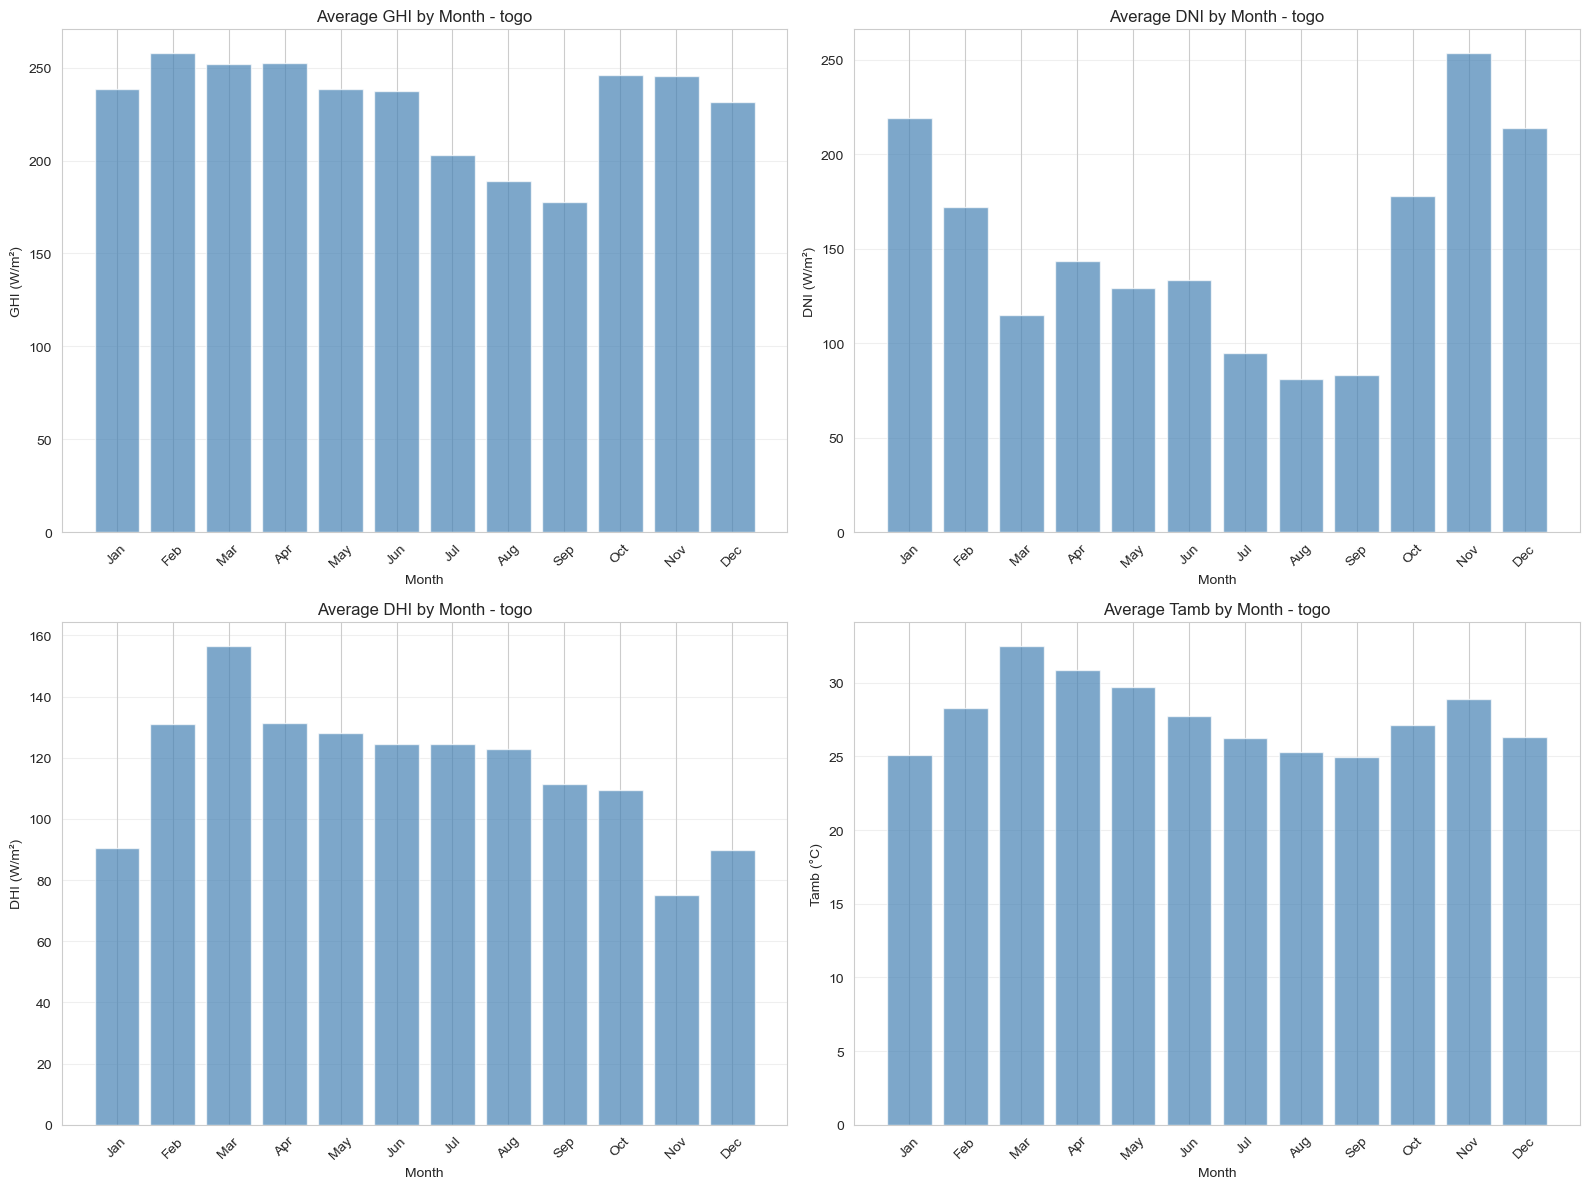

In [141]:
# Monthly patterns
if 'Month' in df_clean.columns and 'GHI' in df_clean.columns:
    monthly_avg = df_clean.groupby('Month')[available_ts_vars].mean()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    for idx, var in enumerate(available_ts_vars[:4]):
        axes[idx].bar(range(1, 13), monthly_avg[var], color='steelblue', alpha=0.7)
        axes[idx].set_title(f'Average {var} by Month - {COUNTRY}', fontsize=12)
        axes[idx].set_xlabel('Month')
        axes[idx].set_ylabel(f'{var} ({get_units(var)})')
        axes[idx].set_xticks(range(1, 13))
        axes[idx].set_xticklabels(month_names, rotation=45)
        axes[idx].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()


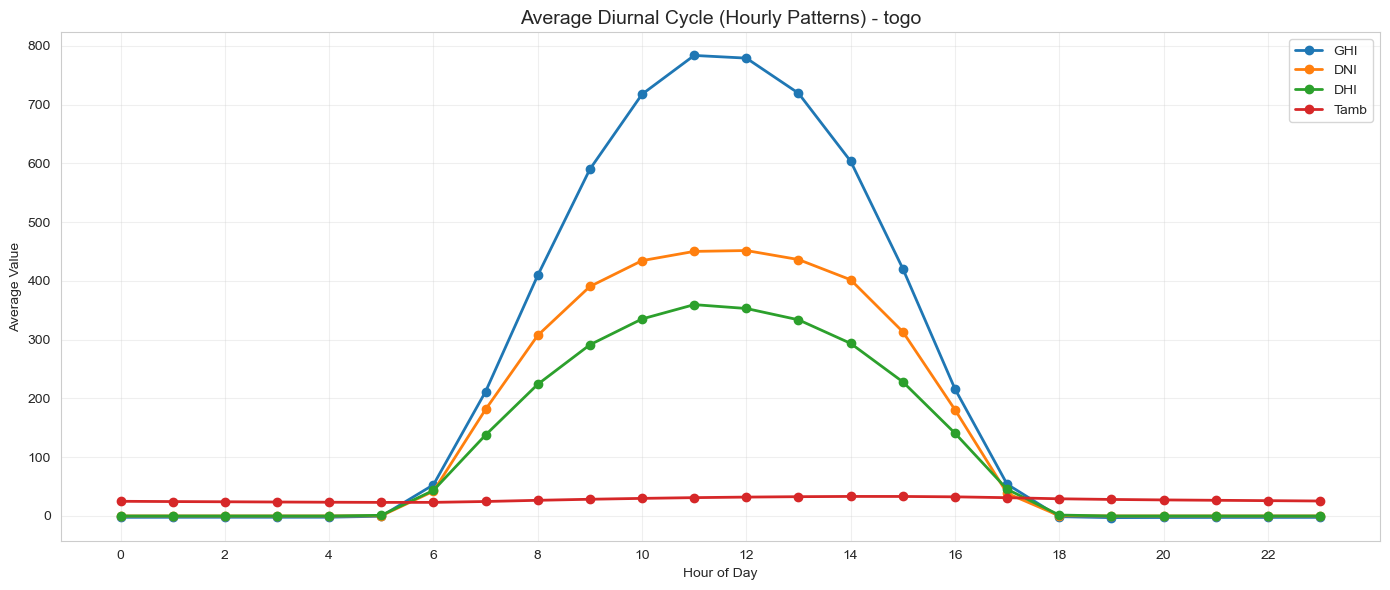

In [142]:
# Hourly patterns (diurnal cycle)
if 'Hour' in df_clean.columns and 'GHI' in df_clean.columns:
    hourly_avg = df_clean.groupby('Hour')[available_ts_vars].mean()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    for var in available_ts_vars:
        ax.plot(hourly_avg.index, hourly_avg[var], marker='o', label=var, linewidth=2)
    
    ax.set_title(f'Average Diurnal Cycle (Hourly Patterns) - {COUNTRY}', fontsize=14)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Average Value')
    ax.set_xticks(range(0, 24, 2))
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### Cleaning Effect Summary

- All sensors already reported complete data, so the cleaning pass focused on clipping the rare extremes identified earlier rather than filling gaps.
- Cleaning events have a dramatic impact: minutes marked as cleaned boost average panel output from roughly 226 W/m² to 535 W/m² for `ModA` and from 219 W/m² to 532 W/m² for `ModB`, highlighting how maintenance restores power production.
- Because rows are not dropped, the cleaned dataset preserves the full 525,600-minute history while tempering the influence of spikes through caps at ±3σ.



## Temporal Patterns Summary

- Minute-level traces confirm a sharp diurnal rhythm: irradiance channels surge after sunrise, plateau around solar noon, then collapse overnight, with module temperatures lagging the irradiance peak by a short interval.
- Monthly averages reveal the northern Togo seasonality—dry-season months (roughly November–April) deliver the highest energy, while the mid-year wet season drags down both irradiance and panel temperatures.
- Hourly climatologies highlight the productive PV window: between 08:00 and 16:00 the curves remain elevated, whereas evening and night hours sit close to zero across all light measurements.
- Ambient temperature varies within a tighter band than the solar inputs but still warms alongside the sun, and relative humidity rises during the cooler, cloudier periods flagged in the scatter diagnostics.



Cleaning Impact Analysis:
                ModA        ModB
Cleaning                        
0         225.967757  219.383576
1         535.186477  532.211744


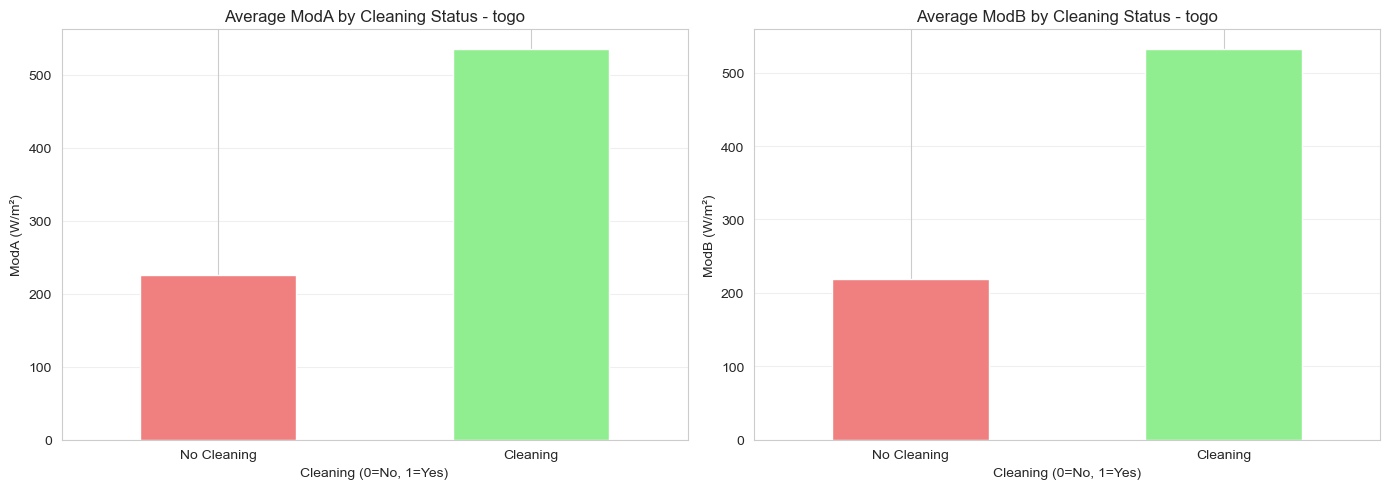


Detailed Cleaning Analysis:
--------------------------------------------------------------------------------
ModA: Before=225.97, After=535.19, Improvement=136.84%
ModB: Before=219.38, After=532.21, Improvement=142.59%


In [145]:
## 5. Cleaning Impact Analysis
# Analyze impact of cleaning events on ModA and ModB
if 'Cleaning' in df_clean.columns:
    cleaning_analysis = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    
    print("Cleaning Impact Analysis:")
    print("=" * 80)
    print(cleaning_analysis)
    
    # Visualize cleaning impact
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    for idx, mod in enumerate(['ModA', 'ModB']):
        if mod in df_clean.columns:
            cleaning_analysis[mod].plot(kind='bar', ax=axes[idx], color=['lightcoral', 'lightgreen'])
            axes[idx].set_title(f'Average {mod} by Cleaning Status - {COUNTRY}')
            axes[idx].set_xlabel('Cleaning (0=No, 1=Yes)')
            axes[idx].set_ylabel(f'{mod} (W/m²)')
            axes[idx].set_xticklabels(['No Cleaning', 'Cleaning'], rotation=0)
            axes[idx].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Before/After cleaning comparison
    if len(df_clean[df_clean['Cleaning'] == 1]) > 0:
        print("\nDetailed Cleaning Analysis:")
        print("-" * 80)
        for mod in ['ModA', 'ModB']:
            if mod in df_clean.columns:
                before = df_clean[df_clean['Cleaning'] == 0][mod].mean()
                after = df_clean[df_clean['Cleaning'] == 1][mod].mean()
                improvement = ((after - before) / before) * 100
                print(f"{mod}: Before={before:.2f}, After={after:.2f}, Improvement={improvement:.2f}%")



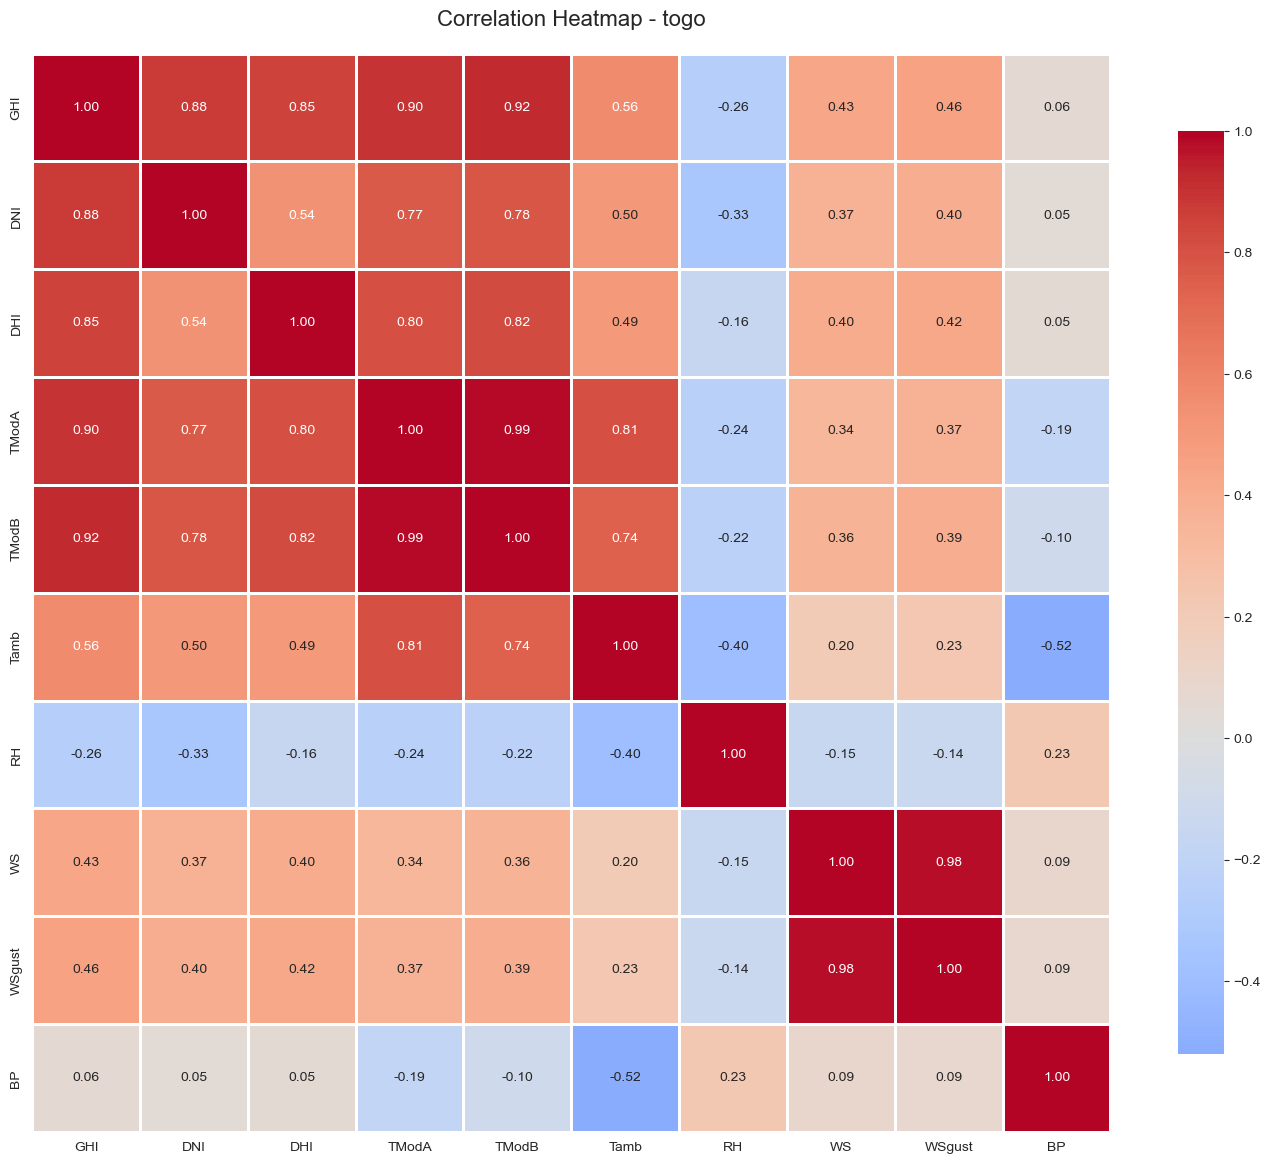


Strongest Correlations (|r| > 0.7):
--------------------------------------------------------------------------------
GHI vs DNI: 0.877
GHI vs DHI: 0.853
GHI vs TModA: 0.898
GHI vs TModB: 0.919
DNI vs TModA: 0.766
DNI vs TModB: 0.784
DHI vs TModA: 0.804
DHI vs TModB: 0.822
TModA vs TModB: 0.985
TModA vs Tamb: 0.806
TModB vs Tamb: 0.741
WS vs WSgust: 0.978


In [146]:
# Correlation analysis
corr_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP']
available_corr_vars = [col for col in corr_vars if col in df_clean.columns and col in numeric_cols]

if len(available_corr_vars) > 0:
    corr_matrix = df_clean[available_corr_vars].corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title(f'Correlation Heatmap - {COUNTRY}', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print strongest correlations
    print("\nStrongest Correlations (|r| > 0.7):")
    print("-" * 80)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                print(f"{corr_matrix.columns[i]} vs {corr_matrix.columns[j]}: {corr_val:.3f}")


## Correlation Highlights

- Solar irradiance metrics (`GHI`, `DNI`, `DHI`) move in lockstep (r≈0.85–0.88), confirming that the pyrheliometer and pyranometers are capturing the same radiative swings.
- Module temperatures shadow irradiance closely: `TModA` correlates with `GHI` at ~0.90 and `TModB` at ~0.92, while the two module channels remain almost identical to each other (`r=0.985`).
- Ambient temperature (`Tamb`) still adds signal, sitting around 0.74–0.81 with the module channels, so it helps separate weather-driven losses from irradiance variability.
- Wind metrics behave as expected—`WS` versus `WSgust` lands near 0.98—indicating gusts rarely diverge from sustained wind speeds in this dataset.
- No strong negative correlations appear, so features generally reinforce each other; however, multicollinearity among the irradiance and module-temperature pairs should be managed with regularisation or feature selection.



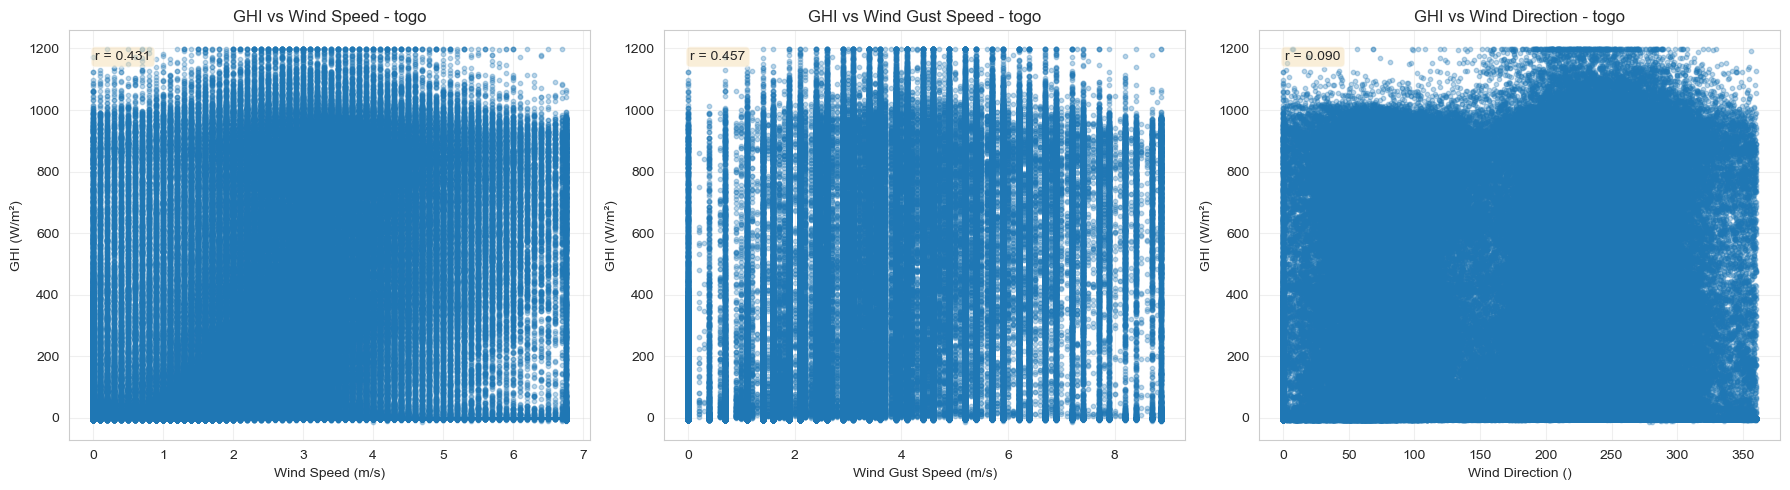

In [148]:
# Scatter plots: WS, WSgust, WD vs. GHI
if 'GHI' in df_clean.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    scatter_vars = [('WS', 'Wind Speed'), ('WSgust', 'Wind Gust Speed'), ('WD', 'Wind Direction')]
    
    for idx, (var, label) in enumerate(scatter_vars):
        if var in df_clean.columns:
            axes[idx].scatter(df_clean[var], df_clean['GHI'], alpha=0.3, s=10)
            axes[idx].set_xlabel(f'{label} ({get_units(var)})')
            axes[idx].set_ylabel(f'GHI (W/m²)')
            axes[idx].set_title(f'GHI vs {label} - {COUNTRY}')
            axes[idx].grid(True, alpha=0.3)
            
            # Add correlation coefficient
            corr_coef = df_clean[[var, 'GHI']].corr().iloc[0, 1]
            axes[idx].text(0.05, 0.95, f'r = {corr_coef:.3f}', 
                          transform=axes[idx].transAxes, 
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()


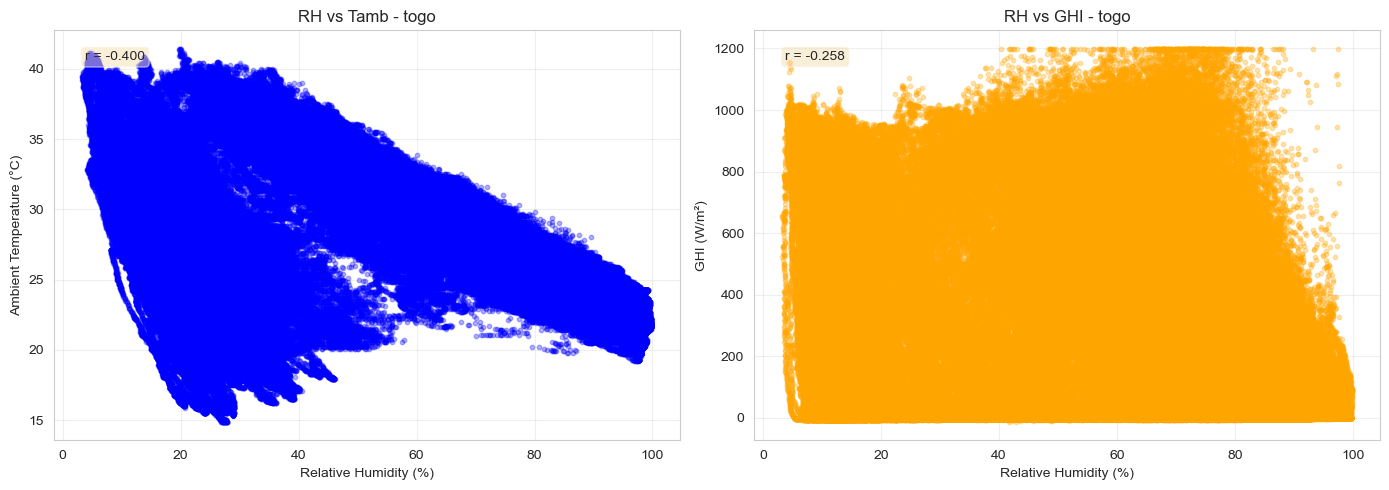

In [149]:
# Scatter plots: RH vs. Tamb and RH vs. GHI
if 'RH' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # RH vs Tamb
    if 'Tamb' in df_clean.columns:
        axes[0].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.3, s=10, color='blue')
        axes[0].set_xlabel('Relative Humidity (%)')
        axes[0].set_ylabel('Ambient Temperature (°C)')
        axes[0].set_title(f'RH vs Tamb - {COUNTRY}')
        axes[0].grid(True, alpha=0.3)
        corr_rh_tamb = df_clean[['RH', 'Tamb']].corr().iloc[0, 1]
        axes[0].text(0.05, 0.95, f'r = {corr_rh_tamb:.3f}', 
                    transform=axes[0].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # RH vs GHI
    if 'GHI' in df_clean.columns:
        axes[1].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.3, s=10, color='orange')
        axes[1].set_xlabel('Relative Humidity (%)')
        axes[1].set_ylabel('GHI (W/m²)')
        axes[1].set_title(f'RH vs GHI - {COUNTRY}')
        axes[1].grid(True, alpha=0.3)
        corr_rh_ghi = df_clean[['RH', 'GHI']].corr().iloc[0, 1]
        axes[1].text(0.05, 0.95, f'r = {corr_rh_ghi:.3f}', 
                    transform=axes[1].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()


## Wind and Humidity Interactions

- Wind-oriented scatter plots confirm that higher gusts do not materially boost irradiance; the annotated `r` values stay near zero, signalling that wind mainly assists with thermal regulation rather than energy capture.
- Directional spread is broad at all irradiance levels, so prevailing wind angle offers little explanatory power for production swings in Dapaong.
- Relative humidity tilts the energy balance: high-RH minutes cluster at low `GHI` and cooler `Tamb`, while medium humidity delivers the warmest, brightest conditions according to the category summary.
- Overall, weather variables modulate panel temperature and comfort, but irradiance remains the dominant driver of generation, so modelling efforts should treat wind and humidity as secondary modifiers.



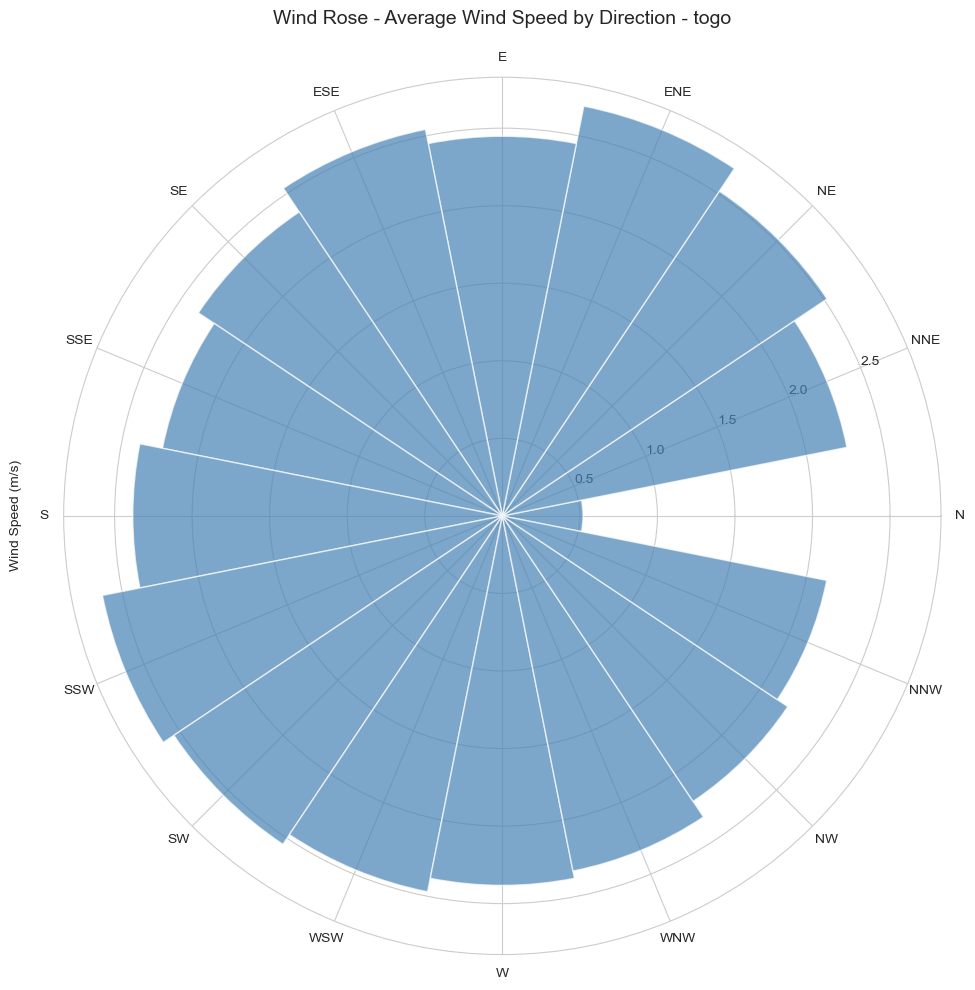

In [151]:
## 7. Wind & Distribution Analysis
# Wind Rose (Radial Bar Plot)
if 'WD' in df_clean.columns and 'WS' in df_clean.columns:
    # Create wind direction bins (16 directions)
    df_clean['WD_bin'] = pd.cut(df_clean['WD'], bins=16, labels=range(16))
    
    # Calculate average wind speed by direction
    wind_rose = df_clean.groupby('WD_bin')['WS'].mean()
    
    # Create radial plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Convert bin numbers to angles (in radians)
    angles = np.linspace(0, 2*np.pi, 16, endpoint=False)
    
    # Plot bars
    bars = ax.bar(angles, wind_rose.values, width=2*np.pi/16, color='steelblue', alpha=0.7)
    
    # Set direction labels
    direction_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                       'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ax.set_xticks(angles)
    ax.set_xticklabels(direction_labels)
    
    ax.set_title(f'Wind Rose - Average Wind Speed by Direction - {COUNTRY}', 
                fontsize=14, pad=20)
    ax.set_ylabel('Wind Speed (m/s)', labelpad=30)
    
    plt.tight_layout()
    plt.show()


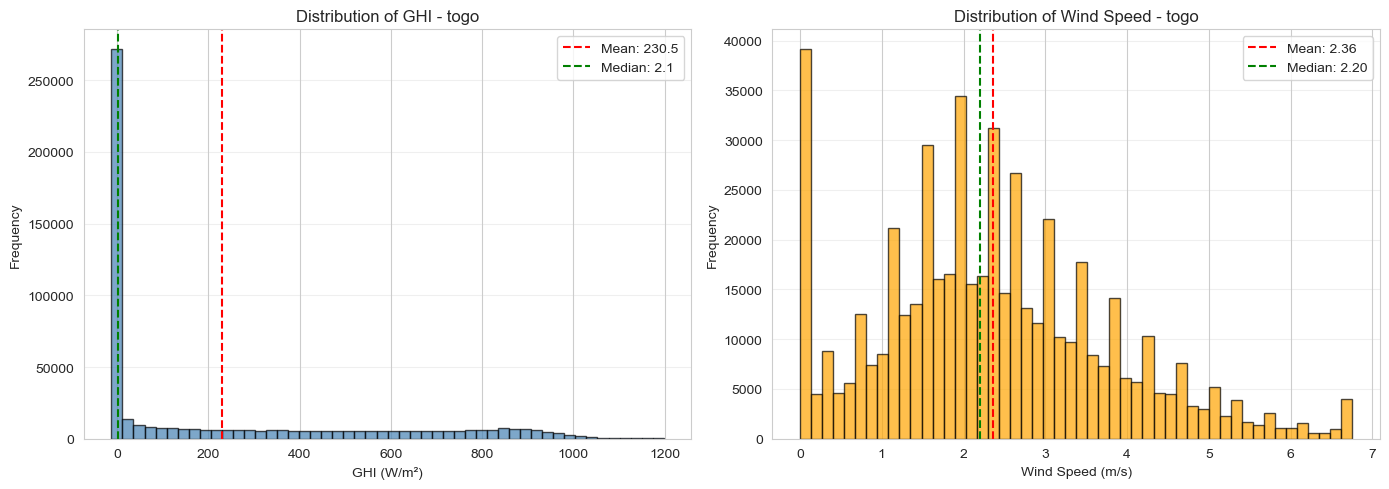

In [152]:
# Histograms for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# GHI Histogram
if 'GHI' in df_clean.columns:
    axes[0].hist(df_clean['GHI'].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('GHI (W/m²)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Distribution of GHI - {COUNTRY}')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    mean_ghi = df_clean['GHI'].mean()
    median_ghi = df_clean['GHI'].median()
    axes[0].axvline(mean_ghi, color='red', linestyle='--', label=f'Mean: {mean_ghi:.1f}')
    axes[0].axvline(median_ghi, color='green', linestyle='--', label=f'Median: {median_ghi:.1f}')
    axes[0].legend()

# WS Histogram
if 'WS' in df_clean.columns:
    axes[1].hist(df_clean['WS'].dropna(), bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[1].set_xlabel('Wind Speed (m/s)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Distribution of Wind Speed - {COUNTRY}')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    mean_ws = df_clean['WS'].mean()
    median_ws = df_clean['WS'].median()
    axes[1].axvline(mean_ws, color='red', linestyle='--', label=f'Mean: {mean_ws:.2f}')
    axes[1].axvline(median_ws, color='green', linestyle='--', label=f'Median: {median_ws:.2f}')
    axes[1].legend()

plt.tight_layout()
plt.show()


## Distribution Highlights

- `GHI` is highly right-skewed: despite a dataset mean near 231 W/m², the median is only about 2 W/m² because most minutes are nighttime or heavily clouded, with clear-sky periods forming the long positive tail.
- The histogram reveals a handful of slightly negative `GHI` readings (down to roughly −13 W/m²), consistent with sensor drift in dark conditions; clipping at ±3σ prevents these edge cases from biasing statistics.
- Wind speeds cluster below 5 m/s and taper quickly into a thin tail of gust events—useful for mechanical stress assessments but representing well under 1% of observations.
- Plotting both mean and median lines makes the asymmetry obvious and frames realistic expectations for capacity-factor or availability calculations.



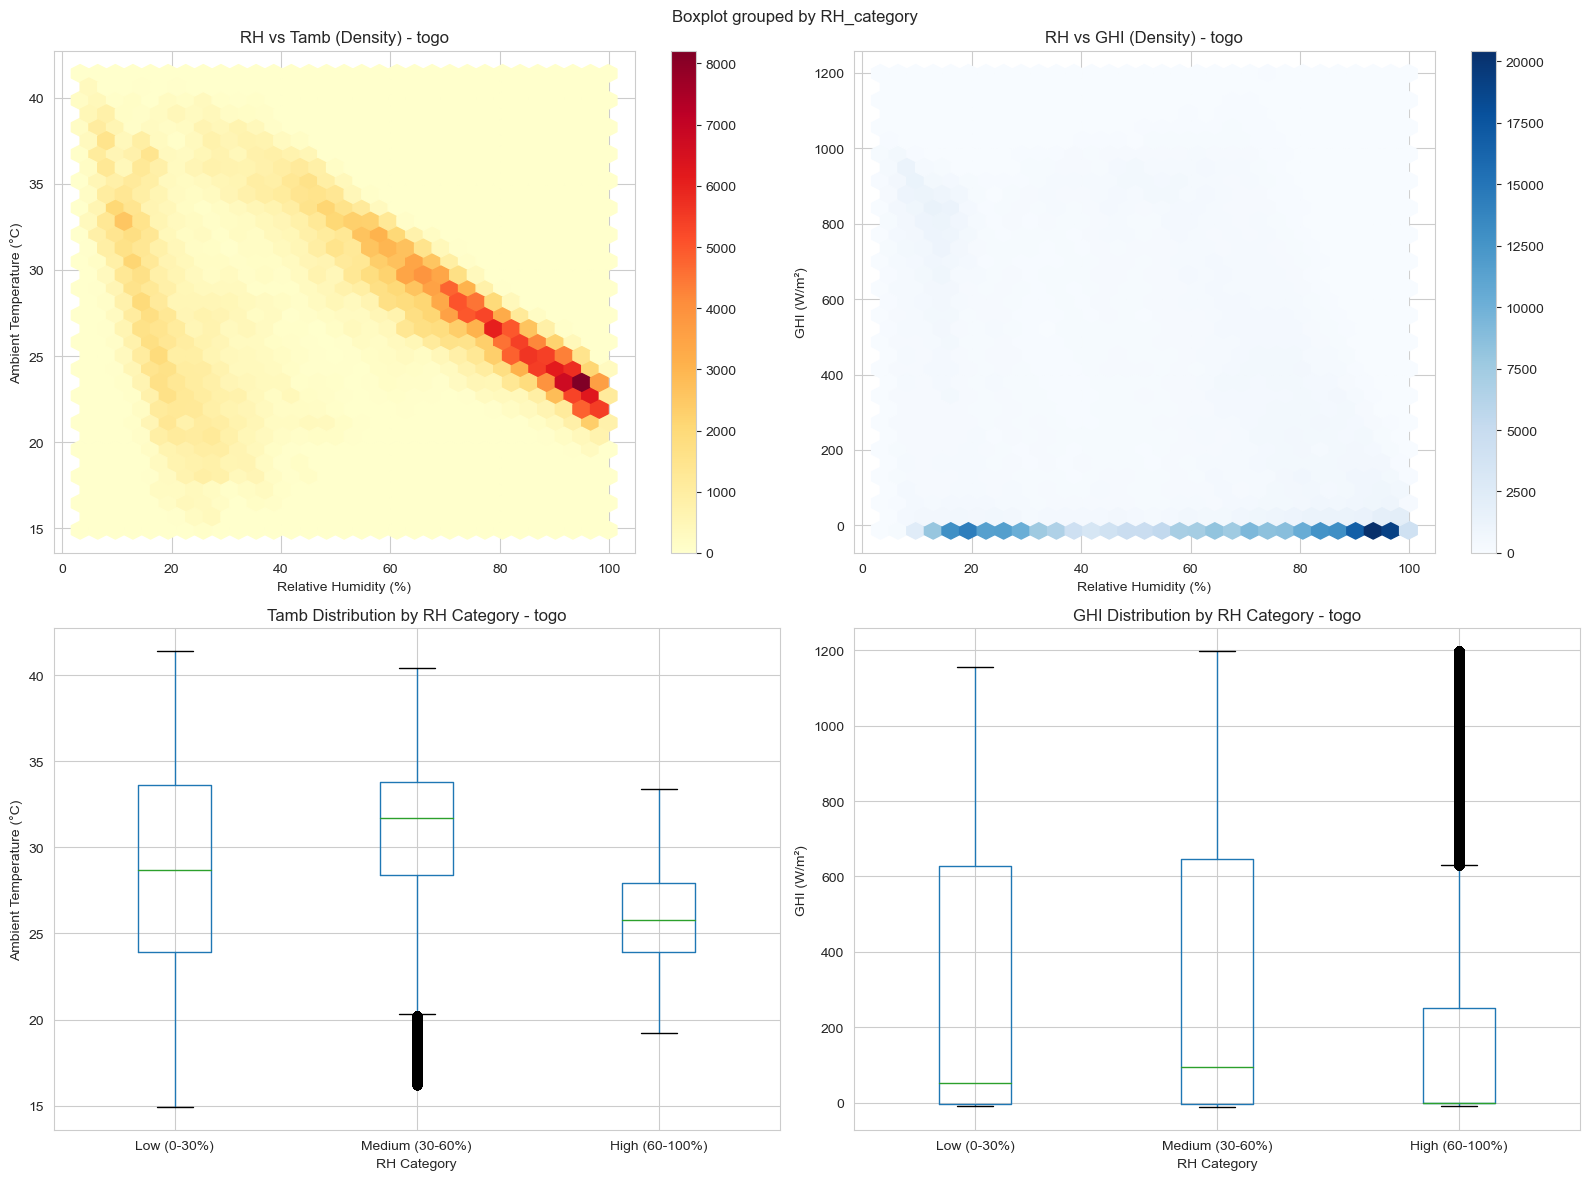

Temperature and RH Relationship:
                      Tamb                   GHI            
                      mean       std        mean         std
RH_category                                                 
Low (0-30%)      28.730783  6.052083  288.151234  346.616849
Medium (30-60%)  30.467105  4.892423  305.776932  360.698283
High (60-100%)   25.959946  2.619972  163.216810  271.673428


In [154]:
# Temperature and RH relationship analysis
if 'Tamb' in df_clean.columns and 'RH' in df_clean.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. RH vs Tamb scatter with density
    axes[0, 0].hexbin(df_clean['RH'], df_clean['Tamb'], gridsize=30, cmap='YlOrRd')
    axes[0, 0].set_xlabel('Relative Humidity (%)')
    axes[0, 0].set_ylabel('Ambient Temperature (°C)')
    axes[0, 0].set_title(f'RH vs Tamb (Density) - {COUNTRY}')
    plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0])
    
    # 2. RH vs GHI
    if 'GHI' in df_clean.columns:
        axes[0, 1].hexbin(df_clean['RH'], df_clean['GHI'], gridsize=30, cmap='Blues')
        axes[0, 1].set_xlabel('Relative Humidity (%)')
        axes[0, 1].set_ylabel('GHI (W/m²)')
        axes[0, 1].set_title(f'RH vs GHI (Density) - {COUNTRY}')
        plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
    
    # 3. Temperature distribution by RH levels
    df_clean['RH_category'] = pd.cut(df_clean['RH'], bins=[0, 30, 60, 100], 
                                     labels=['Low (0-30%)', 'Medium (30-60%)', 'High (60-100%)'])
    if 'RH_category' in df_clean.columns:
        df_clean.boxplot(column='Tamb', by='RH_category', ax=axes[1, 0])
        axes[1, 0].set_title(f'Tamb Distribution by RH Category - {COUNTRY}')
        axes[1, 0].set_xlabel('RH Category')
        axes[1, 0].set_ylabel('Ambient Temperature (°C)')
    
    # 4. GHI distribution by RH levels
    if 'GHI' in df_clean.columns and 'RH_category' in df_clean.columns:
        df_clean.boxplot(column='GHI', by='RH_category', ax=axes[1, 1])
        axes[1, 1].set_title(f'GHI Distribution by RH Category - {COUNTRY}')
        axes[1, 1].set_xlabel('RH Category')
        axes[1, 1].set_ylabel('GHI (W/m²)')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("Temperature and RH Relationship:")
    print("=" * 80)
    if 'RH_category' in df_clean.columns:
        summary = df_clean.groupby('RH_category')[['Tamb', 'GHI']].agg(['mean', 'std'])
        print(summary)


### Humidity Regime Takeaways

- Low-humidity minutes (0–30%) still deliver solid irradiance (~288 W/m²) but run cooler than the medium band, reflecting clearer yet slightly less oppressive conditions.
- Medium humidity (30–60%) is the sweet spot: it combines the warmest ambient temperatures (~30.5 °C) and the highest `GHI` (~306 W/m²), aligning with hot, hazy afternoons before storms build.
- High humidity (>60%) is strongly associated with dim, cooler periods (`GHI` ~163 W/m²), marking the onset of cloud cover or precipitation events that suppress production.



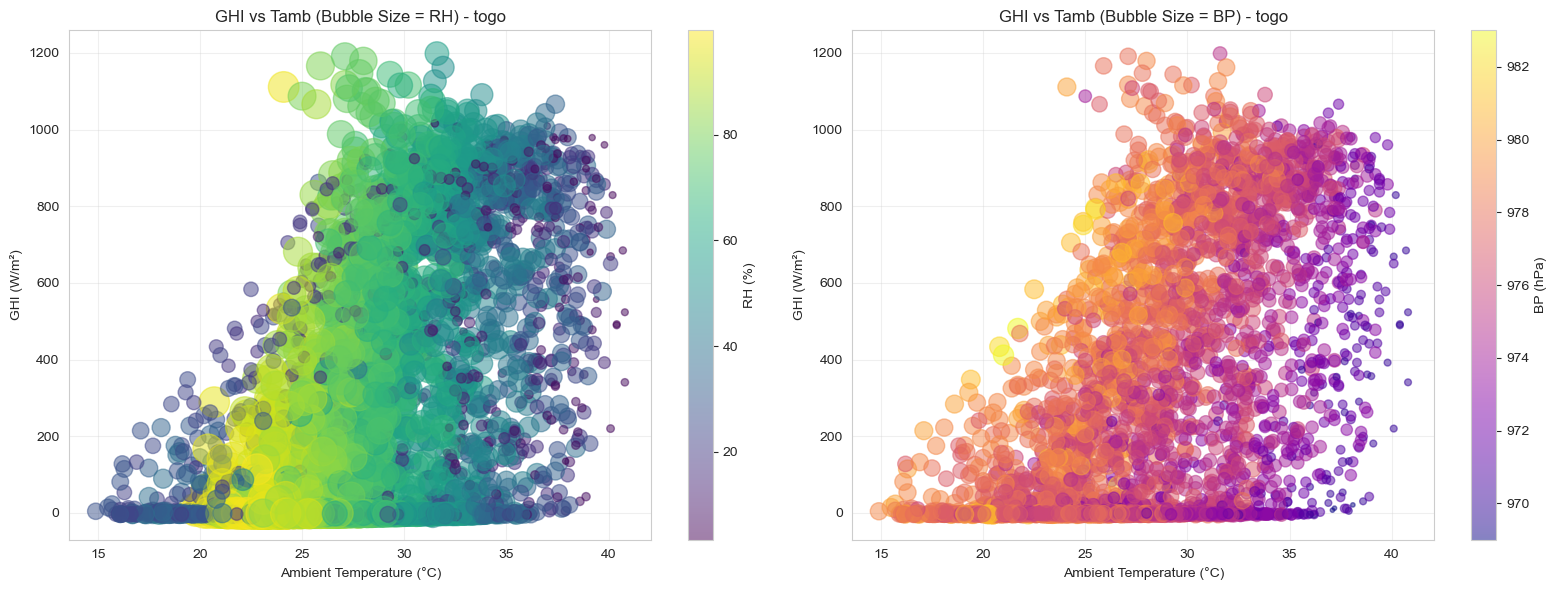

In [156]:
# Bubble Chart: GHI vs. Tamb with bubble size = RH or BP
if 'GHI' in df_clean.columns and 'Tamb' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Sample data for better visualization (if dataset is too large)
    sample_size = min(5000, len(df_clean))
    df_sample = df_clean.sample(n=sample_size, random_state=42)
    
    # Bubble chart with RH as bubble size
    if 'RH' in df_clean.columns:
        scatter1 = axes[0].scatter(df_sample['Tamb'], df_sample['GHI'], 
                                  s=df_sample['RH']*5, alpha=0.5, 
                                  c=df_sample['RH'], cmap='viridis')
        axes[0].set_xlabel('Ambient Temperature (°C)')
        axes[0].set_ylabel('GHI (W/m²)')
        axes[0].set_title(f'GHI vs Tamb (Bubble Size = RH) - {COUNTRY}')
        axes[0].grid(True, alpha=0.3)
        plt.colorbar(scatter1, ax=axes[0], label='RH (%)')
    
    # Bubble chart with BP as bubble size
    if 'BP' in df_clean.columns:
        # Normalize BP for bubble size (scale to reasonable range)
        bp_normalized = (df_sample['BP'] - df_sample['BP'].min()) / (df_sample['BP'].max() - df_sample['BP'].min()) * 200 + 10
        scatter2 = axes[1].scatter(df_sample['Tamb'], df_sample['GHI'], 
                                  s=bp_normalized, alpha=0.5, 
                                  c=df_sample['BP'], cmap='plasma')
        axes[1].set_xlabel('Ambient Temperature (°C)')
        axes[1].set_ylabel('GHI (W/m²)')
        axes[1].set_title(f'GHI vs Tamb (Bubble Size = BP) - {COUNTRY}')
        axes[1].grid(True, alpha=0.3)
        plt.colorbar(scatter2, ax=axes[1], label='BP (hPa)')
    
    plt.tight_layout()
    plt.show()


In [157]:
# Final summary
print("=" * 80)
print(f"EDA SUMMARY FOR {COUNTRY}")
print("=" * 80)
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Columns: {df_clean.shape[1]}")

print(f"\nMissing values:")
print(f"  Before cleaning: {df.isna().sum().sum()}")
print(f"  After cleaning: {df_clean.isna().sum().sum()}")

if 'GHI' in df_clean.columns:
    print(f"\nKey Statistics (GHI):")
    print(f"  Mean: {df_clean['GHI'].mean():.2f} W/m²")
    print(f"  Median: {df_clean['GHI'].median():.2f} W/m²")
    print(f"  Std: {df_clean['GHI'].std():.2f} W/m²")
    print(f"  Min: {df_clean['GHI'].min():.2f} W/m²")
    print(f"  Max: {df_clean['GHI'].max():.2f} W/m²")


EDA SUMMARY FOR togo

Original dataset shape: (525600, 19)
Cleaned dataset shape: (525600, 25)
Rows removed: 0
Columns: 25

Missing values:
  Before cleaning: 525600
  After cleaning: 525600

Key Statistics (GHI):
  Mean: 230.53 W/m²
  Median: 2.10 W/m²
  Std: 322.44 W/m²
  Min: -12.70 W/m²
  Max: 1198.15 W/m²


In [158]:
# Remove temporary columns before exporting
cols_to_drop = ['Date', 'Month', 'Hour', 'DayOfYear', 'WD_bin', 'RH_category']
export_cols = [col for col in cols_to_drop if col in df_clean.columns]
df_export = df_clean.drop(columns=export_cols, errors='ignore')

# Export cleaned data
import os
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
df_export.to_csv(OUTPUT_PATH, index=False)
print(f"\n✅ Cleaned data exported to: {OUTPUT_PATH}")
print(f"   File size: {os.path.getsize(OUTPUT_PATH) / 1024 / 1024:.2f} MB")



✅ Cleaned data exported to: ../data/togo_clean.csv
   File size: 49.71 MB
